https://bit.ly/RSML-2-content

## Датасет

In [62]:
import pandas as pd
import numpy as np
from collections import Counter
from datetime import datetime
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import datetime as dt

In [304]:
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

## Рейтинг

In [458]:
# рейтинг - это оценки от 0 до 5 с шагом 0.5
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [459]:
# выведем для каждого фильма медианную оценку - это будет наша целевая переменная
rating_=pd.DataFrame(ratings.groupby('movieId').rating.median()).reset_index()
rating_

,movieId,rating
0,1,4.0
1,2,3.5
2,3,3.0
3,4,3.0
4,5,3.0
...,...,...
9719,193581,4.0
9720,193583,3.5
9721,193585,3.5
9722,193587,3.5


### Пользователи

In [312]:
grouped_users = tags['userId'].value_counts()
grouped_users

474    1507
567     432
62      370
599     323
477     280
424     273
537     100
125      48
357      45
318      41
184      35
573      31
193      20
18       16
119      14
336      10
2         9
305       8
606       7
327       7
166       6
419       5
103       5
356       5
462       5
21        4
132       4
289       4
291       4
435       4
439       3
177       3
487       3
506       3
513       3
533       3
49        3
509       3
112       3
610       3
205       3
226       3
319       3
341       2
256       2
63        2
76        2
520       2
106       2
138       2
288       1
274       1
300       1
543       1
7         1
161       1
600       1
167       1
Name: userId, dtype: int64

In [313]:
len(grouped_users)

58

In [314]:
grouped_users.median()

4.0

In [315]:
grouped_users.mean()

63.5

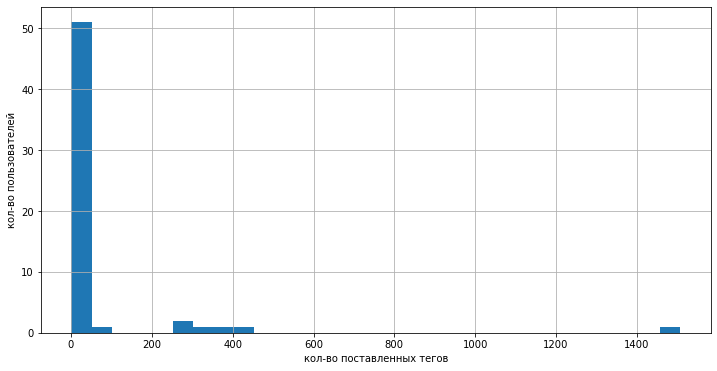

In [316]:
plt.figure(figsize=(12, 6))
grouped_users.hist(bins=30)
plt.xlabel('кол-во поставленных тегов')
plt.ylabel('кол-во пользователей');

### Фильмы

In [460]:
grouped_movies = tags['movieId'].value_counts()
grouped_movies

296     181
2959     54
924      41
293      35
7361     34
       ... 
3307      1
3310      1
3317      1
830       1
2719      1
Name: movieId, Length: 1572, dtype: int64

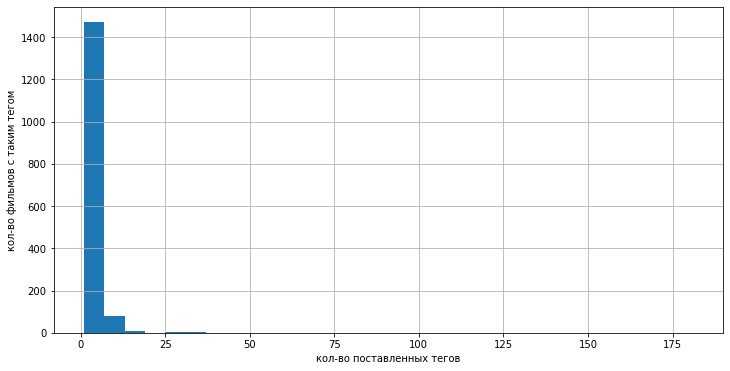

In [461]:
plt.figure(figsize=(12, 6))
grouped_movies.hist(bins=30)
plt.xlabel('кол-во поставленных тегов')
plt.ylabel('кол-во фильмов с таким тегом');

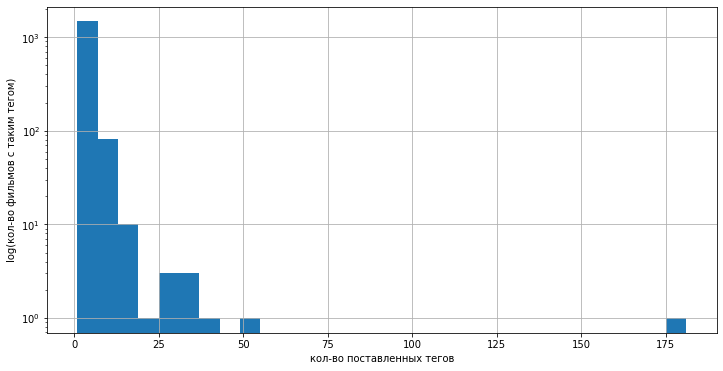

In [462]:
plt.figure(figsize=(12, 6))
grouped_movies.hist(bins=30, log=True)
plt.xlabel('кол-во поставленных тегов')
plt.ylabel('log(кол-во фильмов с таким тегом)');

### Дата

In [463]:
tags['dt'] = pd.to_datetime(tags['timestamp'], errors='coerce')
tags.head()

,userId,movieId,tag,timestamp,dt,year,month,year_month
0,2,60756,funny,1445714994,1970-01-01 00:00:01.445714994,1970,1,1970-1
1,2,60756,Highly quotable,1445714996,1970-01-01 00:00:01.445714996,1970,1,1970-1
2,2,60756,will ferrell,1445714992,1970-01-01 00:00:01.445714992,1970,1,1970-1
3,2,89774,Boxing story,1445715207,1970-01-01 00:00:01.445715207,1970,1,1970-1
4,2,89774,MMA,1445715200,1970-01-01 00:00:01.445715200,1970,1,1970-1


In [464]:
tags['year'] = tags['dt'].dt.year
tags['month'] = tags['dt'].dt.month

In [467]:
tags['year_month'] = tags['year'].astype(str) + '-' + tags['month'].astype(str)
tags

,userId,movieId,tag,timestamp,dt,year,month,year_month
0,2,60756,funny,1445714994,1970-01-01 00:00:01.445714994,1970,1,1970-1
1,2,60756,Highly quotable,1445714996,1970-01-01 00:00:01.445714996,1970,1,1970-1
2,2,60756,will ferrell,1445714992,1970-01-01 00:00:01.445714992,1970,1,1970-1
3,2,89774,Boxing story,1445715207,1970-01-01 00:00:01.445715207,1970,1,1970-1
4,2,89774,MMA,1445715200,1970-01-01 00:00:01.445715200,1970,1,1970-1
...,...,...,...,...,...,...,...,...
3678,606,7382,for katie,1171234019,1970-01-01 00:00:01.171234019,1970,1,1970-1
3679,606,7936,austere,1173392334,1970-01-01 00:00:01.173392334,1970,1,1970-1
3680,610,3265,gun fu,1493843984,1970-01-01 00:00:01.493843984,1970,1,1970-1
3681,610,3265,heroic bloodshed,1493843978,1970-01-01 00:00:01.493843978,1970,1,1970-1


In [466]:
grouped_date = tags['year_month'].value_counts()[:30]
grouped_date[:30]

1970-1    3683
Name: year_month, dtype: int64

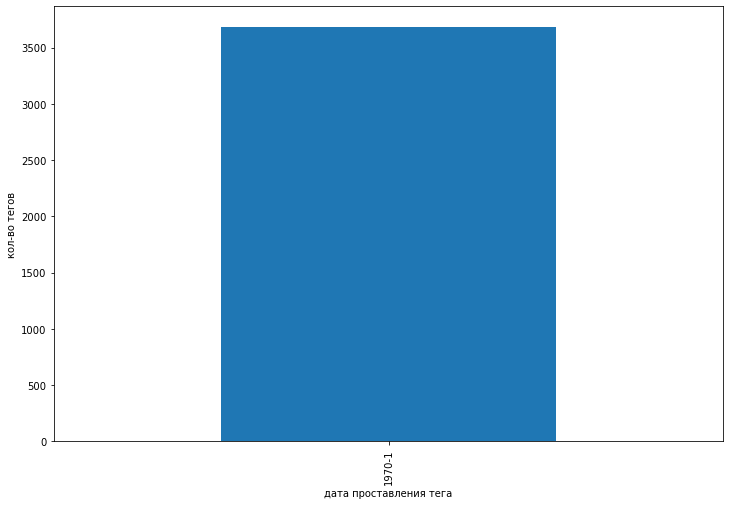

In [324]:
plt.figure(figsize=(12, 8))
grouped_date.plot.bar()
plt.xlabel('дата проставления тега')
plt.ylabel('кол-во тегов');

### Жанры

In [468]:
movies.head()

,movieId,title,genres,num_generes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5
1,2,Jumanji (1995),Adventure|Children|Fantasy,3
2,3,Grumpier Old Men (1995),Comedy|Romance,2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3
4,5,Father of the Bride Part II (1995),Comedy,1


In [469]:
movies['num_generes'] = movies['genres'].apply(lambda x: len(x.split('|')))
movies.head()

,movieId,title,genres,num_generes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5
1,2,Jumanji (1995),Adventure|Children|Fantasy,3
2,3,Grumpier Old Men (1995),Comedy|Romance,2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3
4,5,Father of the Bride Part II (1995),Comedy,1


In [470]:
movies.sort_values('num_generes', ascending=False).head()

,movieId,title,genres,num_generes
7441,81132,Rubber (2010),Action|Adventure|Comedy|Crime|Drama|Film-Noir|...,10
5556,26701,Patlabor: The Movie (Kidô keisatsu patorebâ: T...,Action|Animation|Crime|Drama|Film-Noir|Mystery...,8
6626,56152,Enchanted (2007),Adventure|Animation|Children|Comedy|Fantasy|Mu...,7
2250,2987,Who Framed Roger Rabbit? (1988),Adventure|Animation|Children|Comedy|Crime|Fant...,7
5819,32031,Robots (2005),Adventure|Animation|Children|Comedy|Fantasy|Sc...,7


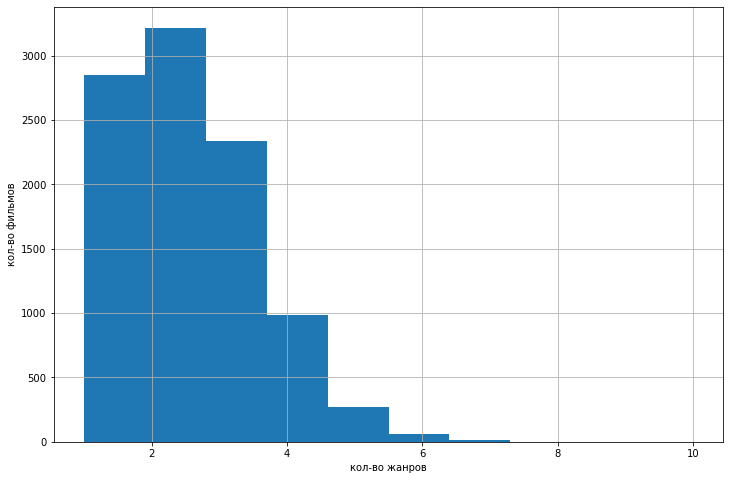

In [471]:
plt.figure(figsize=(12, 8))
movies['num_generes'].hist(bins=10)
plt.xlabel('кол-во жанров')
plt.ylabel('кол-во фильмов');

In [472]:
np.mean(movies['num_generes'])

2.2668856497639087

In [330]:
np.median(movies['num_generes'])

2.0

## TF IDF для жанров

In [474]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [473]:
movies

,movieId,title,genres,num_generes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5
1,2,Jumanji (1995),Adventure|Children|Fantasy,3
2,3,Grumpier Old Men (1995),Comedy|Romance,2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3
4,5,Father of the Bride Part II (1995),Comedy,1
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3
9739,193585,Flint (2017),Drama,1
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2


In [337]:
def change_string(s):
    #return str(s).replace(' ', '').replace('-', '').lower()
    return ' '.join(str(s).replace(' ', '').replace('-', '').replace("\'", '').replace('\"', '').replace(",", ' ').split('|'))

genge_strings=[]
movies1 = []

for movie, group in tqdm(movies.groupby('movieId')):
    genge_strings.append(' '.join([change_string(s) for s in group.genres.values]))
    movies1.append(movie)

  0%|          | 0/9742 [00:00<?, ?it/s]

In [475]:
genge_strings

['Adventure Animation Children Comedy Fantasy',
 'Adventure Children Fantasy',
 'Comedy Romance',
 'Comedy Drama Romance',
 'Comedy',
 'Action Crime Thriller',
 'Comedy Romance',
 'Adventure Children',
 'Action',
 'Action Adventure Thriller',
 'Comedy Drama Romance',
 'Comedy Horror',
 'Adventure Animation Children',
 'Drama',
 'Action Adventure Romance',
 'Crime Drama',
 'Drama Romance',
 'Comedy',
 'Comedy',
 'Action Comedy Crime Drama Thriller',
 'Comedy Crime Thriller',
 'Crime Drama Horror Mystery Thriller',
 'Action Crime Thriller',
 'Drama SciFi',
 'Drama Romance',
 'Drama',
 'Children Drama',
 'Drama Romance',
 'Adventure Drama Fantasy Mystery SciFi',
 'Crime Drama',
 'Drama',
 'Mystery SciFi Thriller',
 'Children Drama',
 'Crime Drama',
 'Children Comedy',
 'Comedy Romance',
 'Drama',
 'Drama War',
 'Action Crime Drama',
 'Drama',
 'Action Adventure Fantasy',
 'Comedy Drama Thriller',
 'Drama Romance',
 'Mystery Thriller',
 'Animation Children Drama Musical Romance',
 'Drama R

In [338]:
len(genge_strings)

9742

In [339]:
len(movies)

9742

In [340]:
tfidf_genre = TfidfVectorizer()
X_train_tfidf_genre = tfidf_genre.fit_transform(genge_strings)
X_train_tfidf_genre

<9742x20 sparse matrix of type '<class 'numpy.float64'>'
	with 22084 stored elements in Compressed Sparse Row format>

In [341]:
df1 = pd.concat([movies['movieId'],pd.DataFrame(X_train_tfidf_genre.toarray(), columns=tfidf_genre.get_feature_names_out())], axis = 1)
df1

,movieId,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,...,horror,imax,musical,mystery,nogenreslisted,romance,scifi,thriller,war,western
0,1,0.000000,0.416846,0.516225,0.504845,0.267586,0.0,0.0,0.000000,0.482990,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,2,0.000000,0.512361,0.000000,0.620525,0.000000,0.0,0.0,0.000000,0.593662,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,3,0.000000,0.000000,0.000000,0.000000,0.570915,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.821009,0.0,0.0,0.0,0.0
3,4,0.000000,0.000000,0.000000,0.000000,0.505015,0.0,0.0,0.466405,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.726241,0.0,0.0,0.0,0.0
4,5,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,0.436010,0.000000,0.614603,0.000000,0.318581,0.0,0.0,0.000000,0.575034,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9738,193583,0.000000,0.000000,0.682937,0.000000,0.354002,0.0,0.0,0.000000,0.638968,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9739,193585,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9740,193587,0.578606,0.000000,0.815607,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


## TF IDF для тегов

In [342]:
tags_ = pd.DataFrame(tags.groupby('movieId').tag.apply(list).reset_index())
tags_.tag = tags_.tag.astype(str).str.strip('[]')
tags_

,movieId,tag
0,1,"'pixar', 'pixar', 'fun'"
1,2,"'fantasy', 'magic board game', 'Robin Williams..."
2,3,"'moldy', 'old'"
3,5,"'pregnancy', 'remake'"
4,7,'remake'
...,...,...
1567,183611,"'Comedy', 'funny', 'Rachel McAdams'"
1568,184471,"'adventure', 'Alicia Vikander', 'video game ad..."
1569,187593,"'Josh Brolin', 'Ryan Reynolds', 'sarcasm'"
1570,187595,"'Emilia Clarke', 'star wars'"


In [343]:
def change_string(s):
    #return str(s).replace(' ', '').replace('-', '').lower()
    return ' '.join(str(s).replace(' ', '').replace('-', '').replace("\'", '').replace('\"', '').replace(",", ' ').split('|'))


tag_strings = []

for movie, group in tqdm(tags_.groupby('movieId')):
    tag_strings.append(' '.join([change_string(s) for s in group.tag.values]))

  0%|          | 0/1572 [00:00<?, ?it/s]

In [476]:
tag_strings

['pixar pixar fun',
 'fantasy magicboardgame RobinWilliams game',
 'moldy old',
 'pregnancy remake',
 'remake',
 'politics president',
 'politics president',
 'Mafia',
 'JaneAusten',
 'Hollywood',
 'serialkiller',
 'alcoholism',
 'Shakespeare',
 'InNetflixqueue JaneAusten',
 'kidnapping',
 'highschool teacher',
 'timetravel timetravel BradPitt BruceWillis mindfuck Postapocalyptic postapocalyptic remake timetravel twistending',
 'Animalmovie pigs villainnonexistentornotneededforgoodstory',
 'deathpenalty Nun',
 'twins',
 'chickflick funny PaulRudd quotable seenmorethanonce Emma JaneAusten',
 'InNetflixqueue SouthAfrica',
 'Shakespeare',
 'England',
 'Journalism',
 'wedding',
 'mystery twistending serialkiller',
 'mindfuck suspense thriller tricky twistending heist',
 'adoption prostitution',
 'writing',
 'music',
 'JekyllandHyde',
 'theater',
 'crime offbeatcomedy quirky',
 'testtag golf AdamSandler',
 'muppets',
 'beautifulscenery epic historical inspirational Medieval melgibson Oscar(

In [344]:
len(tag_strings)

1572

In [345]:
tfidf_tag = TfidfVectorizer()
X_train_tfidf_tag = tfidf_tag.fit_transform(tag_strings)
X_train_tfidf_tag

<1572x1470 sparse matrix of type '<class 'numpy.float64'>'
	with 3596 stored elements in Compressed Sparse Row format>

In [346]:
df2 = pd.concat([tags_['movieId'],pd.DataFrame(X_train_tfidf_tag.toarray(), columns=tfidf_tag.get_feature_names_out())], axis = 1)
df2

,movieId,06oscarnominatedbestmovieanimation,1900s,1920s,1950s,1960s,1970s,1980s,1990s,2001like,...,worldwari,worldwarii,writing,wrongfulimprisonment,wry,youngermen,zither,zoekazan,zombies,zooeydeschanel
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,183611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1568,184471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1569,187593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1570,187595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Объединяем в одну таблицу рейтинг, жанры и теги

In [478]:
movies_with_tags = df1.merge(df2, on='movieId', how = 'left').merge(rating_, on='movieId', how = 'left')
movies_with_tags.head()

,movieId,action_x,adventure_x,animation_x,children_x,comedy_x,crime_x,documentary_x,drama_x,fantasy_x,...,worldwarii,writing,wrongfulimprisonment,wry,youngermen,zither,zoekazan,zombies,zooeydeschanel,rating
0,1,0.0,0.416846,0.516225,0.504845,0.267586,0.0,0.0,0.000000,0.482990,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,2,0.0,0.512361,0.000000,0.620525,0.000000,0.0,0.0,0.000000,0.593662,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5
2,3,0.0,0.000000,0.000000,0.000000,0.570915,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,4,0.0,0.000000,0.000000,0.000000,0.505015,0.0,0.0,0.466405,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
4,5,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [369]:
movies_with_tags.drop(columns = 'rating')

,movieId,action_x,adventure_x,animation_x,children_x,comedy_x,crime_x,documentary_x,drama_x,fantasy_x,...,worldwari,worldwarii,writing,wrongfulimprisonment,wry,youngermen,zither,zoekazan,zombies,zooeydeschanel
0,1,0.000000,0.416846,0.516225,0.504845,0.267586,0.0,0.0,0.000000,0.482990,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.000000,0.512361,0.000000,0.620525,0.000000,0.0,0.0,0.000000,0.593662,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.000000,0.000000,0.000000,0.000000,0.570915,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.000000,0.000000,0.000000,0.000000,0.505015,0.0,0.0,0.466405,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,0.436010,0.000000,0.614603,0.000000,0.318581,0.0,0.0,0.000000,0.575034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9738,193583,0.000000,0.000000,0.682937,0.000000,0.354002,0.0,0.0,0.000000,0.638968,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9739,193585,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9740,193587,0.578606,0.000000,0.815607,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [479]:
movies_with_tags = movies_with_tags.loc[movies_with_tags.rating.notnull()]

In [480]:
movies_with_tags

,movieId,action_x,adventure_x,animation_x,children_x,comedy_x,crime_x,documentary_x,drama_x,fantasy_x,...,worldwarii,writing,wrongfulimprisonment,wry,youngermen,zither,zoekazan,zombies,zooeydeschanel,rating
0,1,0.000000,0.416846,0.516225,0.504845,0.267586,0.0,0.0,0.000000,0.482990,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,2,0.000000,0.512361,0.000000,0.620525,0.000000,0.0,0.0,0.000000,0.593662,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5
2,3,0.000000,0.000000,0.000000,0.000000,0.570915,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,4,0.000000,0.000000,0.000000,0.000000,0.505015,0.0,0.0,0.466405,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
4,5,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,0.436010,0.000000,0.614603,0.000000,0.318581,0.0,0.0,0.000000,0.575034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
9738,193583,0.000000,0.000000,0.682937,0.000000,0.354002,0.0,0.0,0.000000,0.638968,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5
9739,193585,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5
9740,193587,0.578606,0.000000,0.815607,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5


In [481]:
movies_with_tags = movies_with_tags.fillna(0.0)

In [432]:
movies_with_tags

,movieId,action_x,adventure_x,animation_x,children_x,comedy_x,crime_x,documentary_x,drama_x,fantasy_x,...,worldwarii,writing,wrongfulimprisonment,wry,youngermen,zither,zoekazan,zombies,zooeydeschanel,rating
0,1,0.000000,0.416846,0.516225,0.504845,0.267586,0.0,0.0,0.000000,0.482990,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,2,0.000000,0.512361,0.000000,0.620525,0.000000,0.0,0.0,0.000000,0.593662,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5
2,3,0.000000,0.000000,0.000000,0.000000,0.570915,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,4,0.000000,0.000000,0.000000,0.000000,0.505015,0.0,0.0,0.466405,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,5,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,0.436010,0.000000,0.614603,0.000000,0.318581,0.0,0.0,0.000000,0.575034,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
9738,193583,0.000000,0.000000,0.682937,0.000000,0.354002,0.0,0.0,0.000000,0.638968,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5
9739,193585,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5
9740,193587,0.578606,0.000000,0.815607,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5


## Обучаем модель

In [433]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

In [434]:
from sklearn.model_selection import train_test_split

In [437]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [443]:
from sklearn import preprocessing


lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(movies_with_tags['rating'])

In [444]:
encoded

array([14, 12, 10, ..., 12, 12, 14], dtype=int64)

In [482]:
x_train, x_test, y_train, y_test = train_test_split(movies_with_tags.drop(columns = ['movieId', 'rating']), encoded, test_size=0.2 )

In [483]:
model = make_pipeline(StandardScaler(), LogisticRegression())

In [484]:

model.fit( x_train,y_train )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [485]:
model.predict( x_test)

array([14, 10, 14, ..., 10, 12, 10], dtype=int64)

In [490]:
lab_enc.inverse_transform(model.predict( x_test))

array([4. , 3. , 4. , ..., 3. , 3.5, 3. ])

In [491]:
lab_enc.inverse_transform(y_test)

array([3.75, 3.  , 1.5 , ..., 2.5 , 4.  , 3.  ])

In [487]:
from sklearn.metrics import mean_squared_error 
rmse = mean_squared_error(y_test, model.predict( x_test), squared = False)

In [488]:
rmse

3.7943944583968334

In [489]:
model.score(x_test, y_test)

0.2596401028277635

In [453]:
model.score(x_train, y_train)

0.3392466898058876